<a href="https://colab.research.google.com/github/akshar1277/Pytorch_learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).



### 1. Make classfication data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples=1000

# create circles
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles=pd.DataFrame({"x1":X[:,0],
                      "X2":X[:,1],
                      "label":y})
circles.head(10)

,x1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


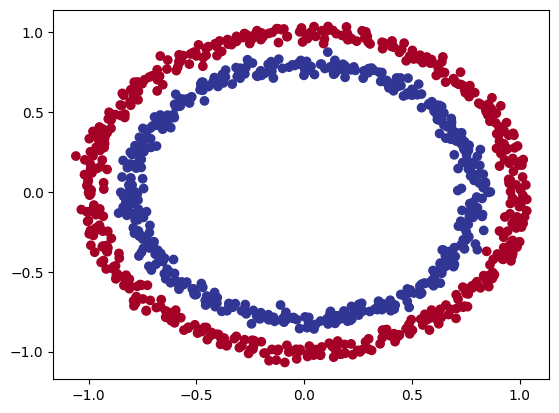

In [6]:
# Visualise
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note : The data we're working with if ofter referred to as a toy dataset,that is small enough to experiment but still sizeable enough to practice the fundaments

 ### 1.1 Check input and output shapes

In [7]:
 X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [8]:
# View the first examples of features and labels
X_sample=X[0]
y_sample=y[0]

print(f"values for one smample of x: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one smample of x: {X_sample.shape} and the same for y: {y_sample.shape}")


values for one smample of x: [0.75424625 0.23148074] and the same for y: 1
Shapes for one smample of x: (2,) and the same for y: ()



### 1.2 Turn data into tensors and create train and test splits


In [9]:
# Turn data into tensors

import torch

In [10]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
# Split daata into trainig and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42
                                              )

In [12]:
len(X_train)

800

## 2. Building a model

Lets build a model to classify our blue and red dots.

To do so we want to:
1. setup device agonstic code so our code will run on a n accelerator (GPU) if there is one
2. construct a model (by subclassing `nn.Module`)
3. Define a loss function and opimizer
4. Create a training and test loop





In [13]:
# import pytorch and nn
import torch
from torch import nn

# Make device agnostic code

device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Noe we've setup device agonostic code,let's create a model that:

1. Subclasses `nn.Module` (almost all models in Pytorch subclass `nn.module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation ) of the model .
4. Instatiate  an instace of our model class and send it to the target device


In [14]:
from sklearn import datasets
# 1. Construct  a model that subclass nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable  of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5) #takes in 2 features and upsclase to 5 features
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  #3. Define a froward() method that outliines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) #x-> layer_1 -> layer_2 ->output

# 4.Instantiate an instance of our model class and send it to the target device

model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
device

'cuda'

In [16]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [17]:
# lets replicate the model above using nn.sequential()

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3233,  0.3978],
                      [-0.0756, -0.3850],
                      [ 0.0343,  0.5067],
                      [ 0.6532,  0.4997],
                      [ 0.6075, -0.6577]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.6263, -0.1931,  0.6671,  0.1062,  0.6715], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0580,  0.2091,  0.2029,  0.3461, -0.0227]], device='cuda:0')),
             ('1.bias', tensor([-0.2700], device='cuda:0'))])

In [19]:
# Make predictions
with torch.inference_mode():

  untrained_pred=model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_pred)} , shape:{untrained_pred.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\n First 10 predictions: \n {untrained_pred[:10]}")
print(f"\n First 10 labels:\n {y_test[:10]}")

Length of predictions:200 , shape:torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

 First 10 predictions: 
 tensor([[-0.1314],
        [-0.0073],
        [-0.3785],
        [-0.0617],
        [-0.2546],
        [-0.1799],
        [ 0.0712],
        [ 0.0311],
        [-0.3833],
        [ 0.0024]], device='cuda:0')

 First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

which loss function or optimizer should you use ?

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classfication you might want binary cross entroy or categorical cross entropy

As a remineder the loss functin measure how wrong your models predictions are.

And for optimizers two fo the most common and useful are SGD and Adam however PyTorch has many built-in options.

* For the loss function we're going to use `torch.nn.BECwithLogitsLoss()`


In [20]:
# setup the loss function
# loss_fn=nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn=nn.BCEWithLogitsLoss() # it is sigmoid activation function.

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [21]:
# calculate accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred)) * 100
  return acc



## 3. Train model
To train our model ,

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward
5. optimizer step (gradient descent )

In [22]:
#  view the first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits


tensor([[-0.1314],
        [-0.0073],
        [-0.3785],
        [-0.0617],
        [-0.2546]], device='cuda:0')

In [23]:
# use the sigmoid activation fucntion on our model logits to them into prediction probability

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.4672],
        [0.4982],
        [0.4065],
        [0.4846],
        [0.4367]], device='cuda:0')

For our prediction probablity values we need to perform a range-style rounding on them .


In [24]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

### 3.2 building training and testing loop

In [25]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

#put data to target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)


# build training and evalution loop

for epoch in range(epochs):

  # training
  model_0.train()

  # 1 forward pass

  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss
  # loss = loss_fn(torch.sigmoid(y_logits),y_train)  # nn.BCELoss expects predictions probablity as input
  loss= loss_fn(y_logits,y_train) #nn.BCEWithLogitLoss expects raw logits as input

  acc= accuracy_fn(y_true=y_train,y_pred=y_pred)

  # 3. optimizer zero grad

  optimizer.zero_grad()

  # 4. loss backward (backpropagation)

  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  # testing
  model_0.eval()

  with torch.inference_mode():

    #1. forward pass

    test_logits=model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc

    test_loss=loss_fn(test_logits,y_test)

    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)



  if epoch%10==0:
    print(f"Epoch:{epoch} | Loss: {loss:.5f},Acc:{acc:.2f} | Test Loss: {test_loss:.5f}, Test acc, {test_acc:.2f}")





Epoch:0 | Loss: 0.69983,Acc:44.38 | Test Loss: 0.70619, Test acc, 47.00
Epoch:10 | Loss: 0.69675,Acc:47.75 | Test Loss: 0.70353, Test acc, 47.50
Epoch:20 | Loss: 0.69559,Acc:49.38 | Test Loss: 0.70221, Test acc, 47.50
Epoch:30 | Loss: 0.69499,Acc:50.00 | Test Loss: 0.70126, Test acc, 47.50
Epoch:40 | Loss: 0.69460,Acc:49.88 | Test Loss: 0.70046, Test acc, 47.00
Epoch:50 | Loss: 0.69431,Acc:50.12 | Test Loss: 0.69977, Test acc, 47.50
Epoch:60 | Loss: 0.69408,Acc:50.12 | Test Loss: 0.69917, Test acc, 48.00
Epoch:70 | Loss: 0.69389,Acc:50.25 | Test Loss: 0.69864, Test acc, 48.00
Epoch:80 | Loss: 0.69374,Acc:50.50 | Test Loss: 0.69818, Test acc, 48.00
Epoch:90 | Loss: 0.69361,Acc:50.38 | Test Loss: 0.69778, Test acc, 48.00


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isnt learning anything

so to inspect it let;s make some prediction sand then visual

to do so we're going to import a function called `plot_decision_boundry()`

In [26]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorc repos

if Path("hepler_functions.py").is_file():
  print("helper funciton already exists ,skipping download")
else:
  print("Download helper_functions.py")

  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

Download helper_functions.py


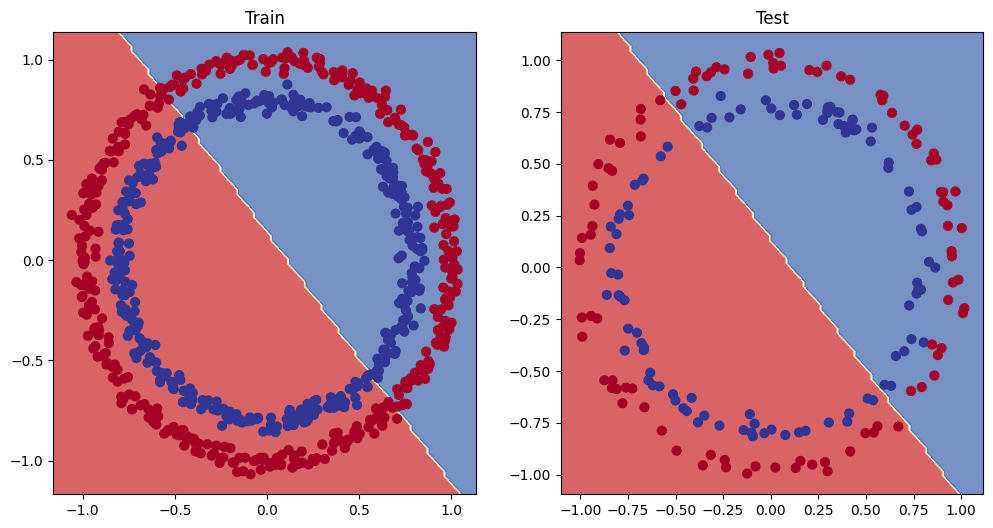

In [27]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


## 5. Imporving  a model (from a model perspective)

* Add more layes - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* changing the activation functions
* change the learning rate
* change the loss function

In [28]:

# imporiving model by adding hidden layers
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1=CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [30]:
# Create a loss function
loss_fn=nn.BCEWithLogitsLoss()

# createa an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)





In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train,y_train= X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ###Training
  model_1.train()

  #1.Forward pass
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  ###Testing

  model_1.eval()
  with torch.inference_mode():
    # 1. Forward passs
    test_logits= model_1 (X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    # 2. calculate loss
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    #  print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch:{epoch} | Loss: {loss:.5f},Acc:{acc:.2f} | Test Loss: {test_loss:.5f}, Test acc, {test_acc:.2f}")






Epoch:0 | Loss: 0.69396,Acc:50.88 | Test Loss: 0.69261, Test acc, 51.00
Epoch:100 | Loss: 0.69305,Acc:50.38 | Test Loss: 0.69379, Test acc, 48.00
Epoch:200 | Loss: 0.69299,Acc:51.12 | Test Loss: 0.69437, Test acc, 46.00
Epoch:300 | Loss: 0.69298,Acc:51.62 | Test Loss: 0.69458, Test acc, 45.00
Epoch:400 | Loss: 0.69298,Acc:51.12 | Test Loss: 0.69465, Test acc, 46.00
Epoch:500 | Loss: 0.69298,Acc:51.00 | Test Loss: 0.69467, Test acc, 46.00
Epoch:600 | Loss: 0.69298,Acc:51.00 | Test Loss: 0.69468, Test acc, 46.00
Epoch:700 | Loss: 0.69298,Acc:51.00 | Test Loss: 0.69468, Test acc, 46.00
Epoch:800 | Loss: 0.69298,Acc:51.00 | Test Loss: 0.69468, Test acc, 46.00
Epoch:900 | Loss: 0.69298,Acc:51.00 | Test Loss: 0.69468, Test acc, 46.00


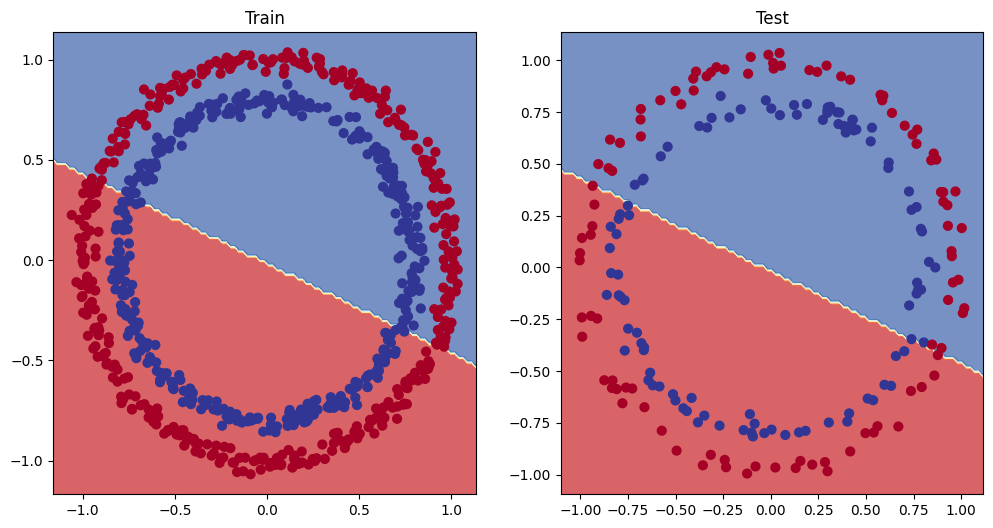

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

### 6 . The missing piece: non-linearity

"what patterns could you draw if you were given an infinite amount of a straight lines?"

or in machine learning terms, an infinite (but really it is finite ) of lineaer and non-linear functions ?)

##### 6.1 Reacreating non-liear data (red and blue circles)

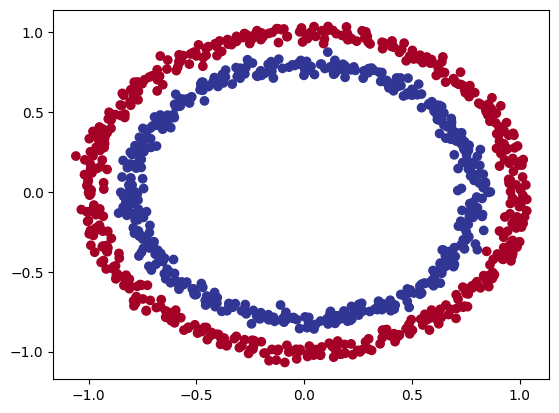

In [33]:
#  Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [34]:
# convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [35]:
# Build a model weith non-lineaer activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU() # relu is non-lineaer activation function


  def forward(self,x):
    # where should we put out non-linear activation functions ?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [38]:


# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


### 6.3 Training a model with non-linearity

In [39]:
# Random seeds

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train , y_train = X_train.to(device), y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

epochs=1000

for epoch in range(epochs):

  model_3.train()

  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc= accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch:{epoch} | Loss: {loss:.5f},Acc:{acc:.2f} | Test Loss: {test_loss:.5f}, Test acc, {test_acc:.2f}")



Epoch:0 | Loss: 0.69295,Acc:50.00 | Test Loss: 0.69319, Test acc, 50.00
Epoch:100 | Loss: 0.69115,Acc:52.88 | Test Loss: 0.69102, Test acc, 52.50
Epoch:200 | Loss: 0.68977,Acc:53.37 | Test Loss: 0.68940, Test acc, 55.00
Epoch:300 | Loss: 0.68795,Acc:53.00 | Test Loss: 0.68723, Test acc, 56.00
Epoch:400 | Loss: 0.68517,Acc:52.75 | Test Loss: 0.68411, Test acc, 56.50
Epoch:500 | Loss: 0.68102,Acc:52.75 | Test Loss: 0.67941, Test acc, 56.50
Epoch:600 | Loss: 0.67515,Acc:54.50 | Test Loss: 0.67285, Test acc, 56.00
Epoch:700 | Loss: 0.66659,Acc:58.38 | Test Loss: 0.66322, Test acc, 59.00
Epoch:800 | Loss: 0.65160,Acc:64.00 | Test Loss: 0.64757, Test acc, 67.50
Epoch:900 | Loss: 0.62362,Acc:74.00 | Test Loss: 0.62145, Test acc, 79.00


### 6.3 Evaluating a model trained with non linea activation functions

In [41]:
# make predictions

model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

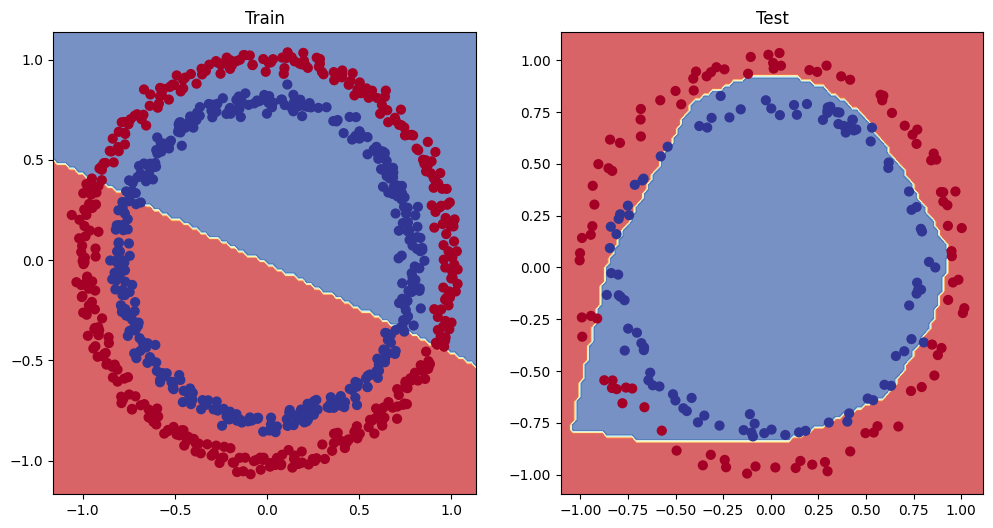

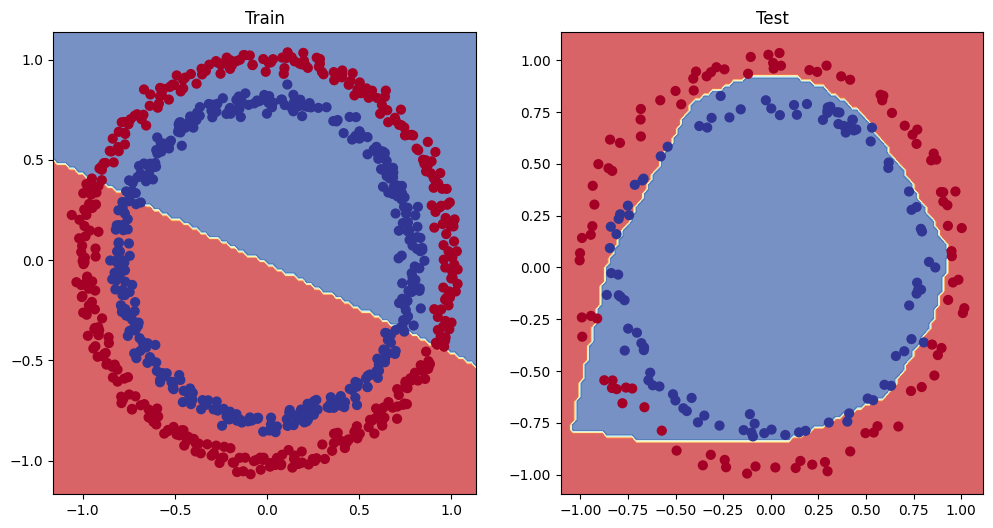

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

### 7. Replicating non-linear activation functions

In [46]:
# create a tensor
A= torch.arange(-10,10,1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

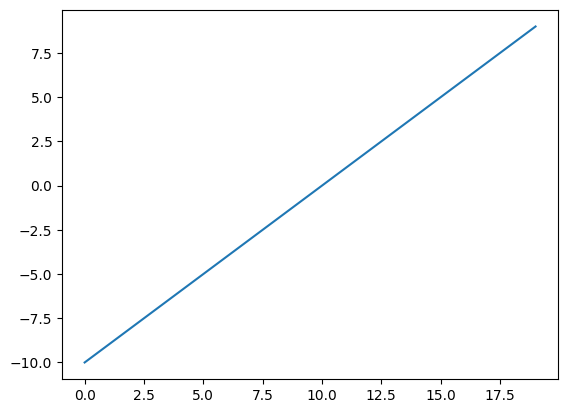

In [47]:
# visualize the tensor
plt.plot(A);

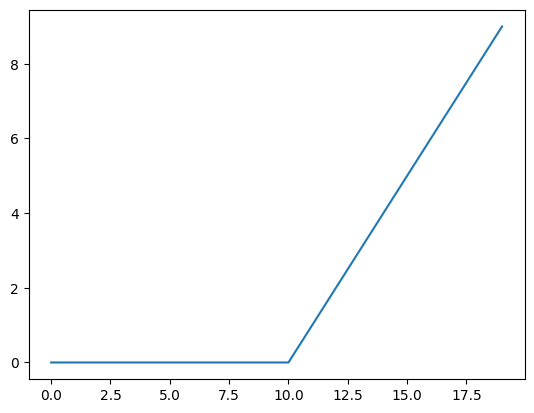

In [48]:
plt.plot(torch.relu(A))

In [50]:
def relu(x:torch.Tensor)->torch.Tensor:
  return torch.maximum(torch.tensor(0),x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

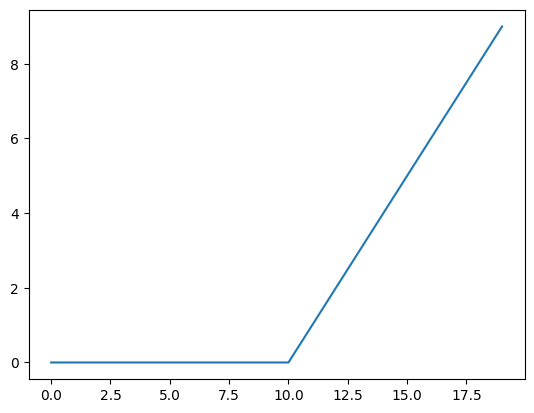

In [51]:
# Plot ReLu activation function
plt.plot(relu(A))

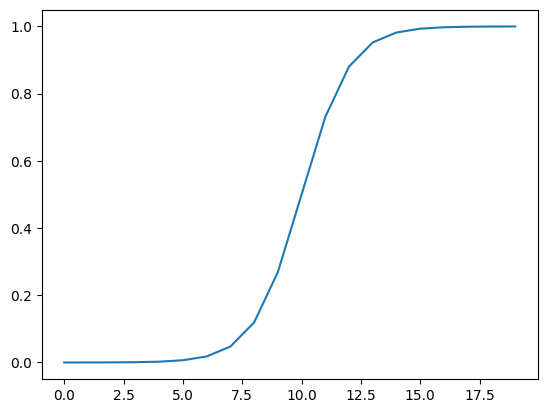

In [52]:
# Now let's do the same for sigmoid

def sigmoid(x):
  return 1/(1+ torch.exp(-x))

plt.plot(torch.sigmoid(A))